In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

target = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\sample_submission.csv')
train = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\train.csv')
test = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\test.csv')

pd.set_option('display.max_columns', None)

In [2]:
print(f'Traget shape {target.shape}')
print(f'Train shape {train.shape}')
print(f'Test shape {test.shape}')

Traget shape (1459, 2)
Train shape (1460, 81)
Test shape (1459, 80)


In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
#break up columns to see Nan
train_2 = train.iloc[:, 3:33]

In [5]:
train_2.isnull().sum()

LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
dtype: int64

In [6]:
#break up columns to see Nan
train_3 = train.iloc[:, 33:81]

In [7]:
train_3.isnull().sum()

BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType  

In [8]:
#checking values in columns how many %
print(f'How many Nan in LotFrontage: {((train["LotFrontage"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in Alley: {((train["Alley"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in BsmtQual: {((train["BsmtQual"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in BsmtCond: {((train["BsmtCond"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in BsmtExposure: {((train["BsmtExposure"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in BsmtFinType1: {((train["BsmtFinType1"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in BsmtFinType2: {((train["BsmtFinType2"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in Electrical: {((train["Electrical"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in FireplaceQu: {((train["FireplaceQu"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in GarageType: {((train["GarageType"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in GarageYrBlt: {((train["GarageYrBlt"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in GarageFinish: {((train["GarageFinish"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in GarageQual: {((train["GarageQual"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in GarageCond: {((train["GarageCond"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in PoolQC : {((train["PoolQC"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in Fence: {((train["Fence"].isnull().sum()/train.shape[0])*100).round(2)}')
print(f'How many Nan in MiscFeature: {((train["MiscFeature"].isnull().sum()/train.shape[0])*100).round(2)}')

How many Nan in LotFrontage: 17.74
How many Nan in Alley: 93.77
How many Nan in BsmtQual: 2.53
How many Nan in BsmtCond: 2.53
How many Nan in BsmtExposure: 2.6
How many Nan in BsmtFinType1: 2.53
How many Nan in BsmtFinType2: 2.6
How many Nan in Electrical: 0.07
How many Nan in FireplaceQu: 47.26
How many Nan in GarageType: 5.55
How many Nan in GarageYrBlt: 5.55
How many Nan in GarageFinish: 5.55
How many Nan in GarageQual: 5.55
How many Nan in GarageCond: 5.55
How many Nan in PoolQC : 99.52
How many Nan in Fence: 80.75
How many Nan in MiscFeature: 96.3


can conclude that Alley, Poplar, Fence, Misfeature and FireplaceQu then they have a lot of values missing. I won't consider them and just drop them

In [9]:
train.drop('Alley', axis=1, inplace=True)
train.drop('FireplaceQu', axis=1, inplace=True)
train.drop('PoolQC', axis=1, inplace=True)
train.drop('Fence', axis=1, inplace=True)
train.drop('MiscFeature', axis=1, inplace=True)
train.drop('LotFrontage', axis=1, inplace=True)
train.drop('MasVnrArea', axis=1, inplace=True)
train.drop('GarageYrBlt', axis=1, inplace=True)

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


now I need to replace the missing values with the median

In [11]:
train.fillna(train['BsmtFinType2'].median, inplace = True)
train.fillna(train['Electrical'].median, inplace = True)
train.fillna(train['BsmtQual'].median, inplace = True)
train.fillna(train['BsmtCond'].median, inplace = True)
train.fillna(train['BsmtExposure'].median, inplace = True)
train.fillna(train['Electrical'].median, inplace = True)
train.fillna(train['BsmtFinType1'].median, inplace = True)
train.fillna(train['BsmtFinType2'].median, inplace = True)
train.fillna(train['GarageType'].median, inplace = True)
train.fillna(train['GarageFinish'].median, inplace = True)
train.fillna(train['GarageQual'].median, inplace = True)
train.fillna(train['GarageCond'].median, inplace = True)

In [12]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

In [13]:
#checkinh on Nan
train_4 = train.iloc[:, 3:33]
train_5 = train.iloc[:, 33:76]

In [14]:
train_4.isnull().sum()

LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
dtype: int64

In [15]:
train_5.isnull().sum()

BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
#transforming values in numbers
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                                    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                    'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                                    'PavedDrive', 'SaleType', 'SaleCondition'])

prepare test-set also how train-set

In [18]:
test.drop('Alley', axis=1, inplace=True)
test.drop('FireplaceQu', axis=1, inplace=True)
test.drop('PoolQC', axis=1, inplace=True)
test.drop('Fence', axis=1, inplace=True)
test.drop('MiscFeature', axis=1, inplace=True)

In [19]:
test.fillna(test['LotFrontage'].median, inplace = True)
test.fillna(test['BsmtFinType2'].median, inplace = True)
test.fillna(test['Electrical'].median, inplace = True)
test.fillna(test['BsmtQual'].median, inplace = True)
test.fillna(test['BsmtCond'].median, inplace = True)
test.fillna(test['BsmtExposure'].median, inplace = True)
test.fillna(test['Electrical'].median, inplace = True)
test.fillna(test['BsmtFinType1'].median, inplace = True)
test.fillna(test['BsmtFinType2'].median, inplace = True)
test.fillna(test['GarageType'].median, inplace = True)
test.fillna(test['GarageFinish'].median, inplace = True)
test.fillna(test['GarageQual'].median, inplace = True)
test.fillna(test['GarageYrBlt'].median, inplace = True)
test.fillna(test['GarageCond'].median, inplace = True)

In [20]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [21]:
X = train.drop('SalePrice', axis =1)
y = train[['SalePrice']]

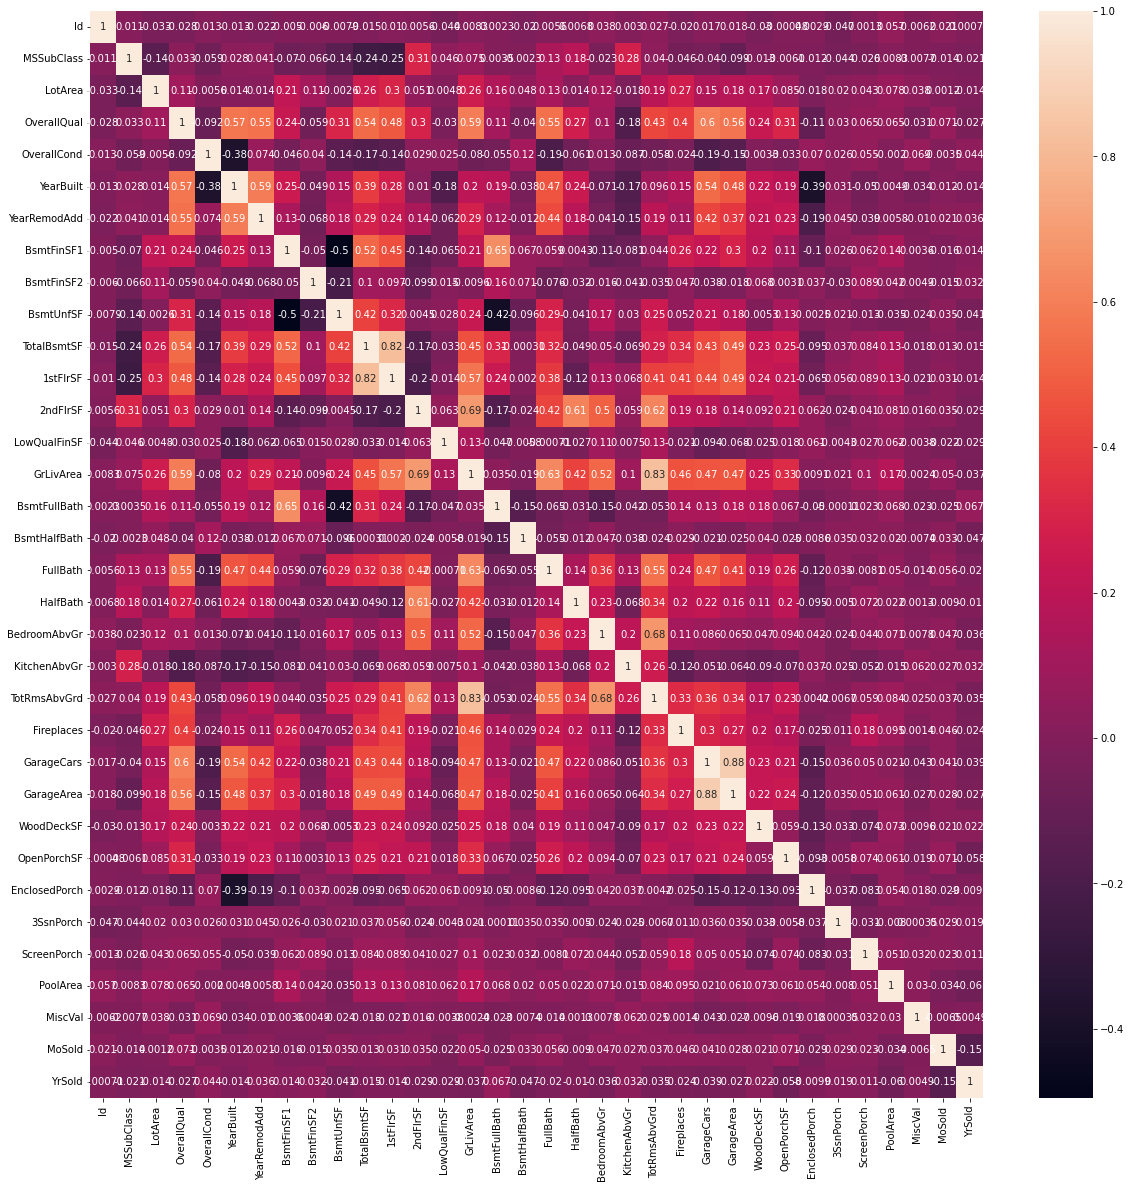

In [22]:
plt.figure(figsize = (20, 20))

sns.heatmap(X.corr(), annot=True)
plt.show()

In [23]:
#it is Proximity to main road or railroad. Checking how it show on chart
train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

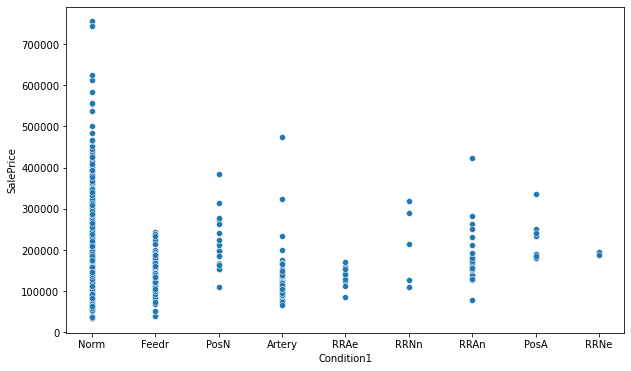

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(train['Condition1'], train['SalePrice'])
plt.show()

as a result gave preference Norm, even if considering the rest a samples Artery the most big compared to the others samples

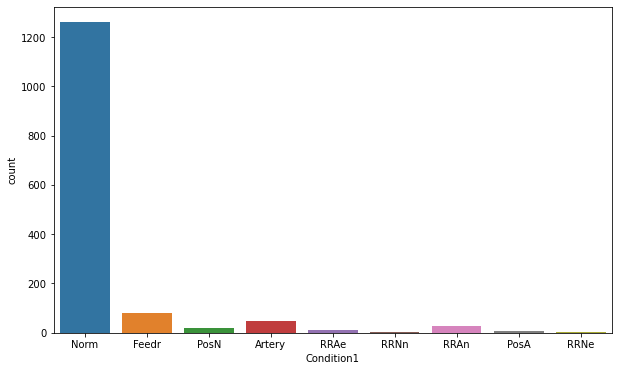

In [25]:
#Counting values in Condition1
plt.figure(figsize=(10,6))
sns.countplot(x='Condition1', data=train)
plt.show()

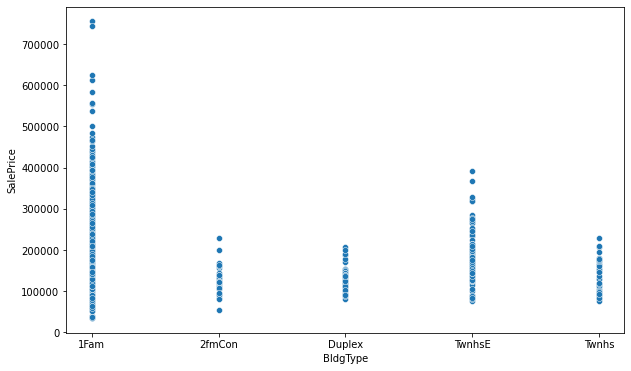

In [26]:
#check the price in depending on type building
plt.figure(figsize=(10, 6))
sns.scatterplot(train['BldgType'], train['SalePrice'])
plt.show()

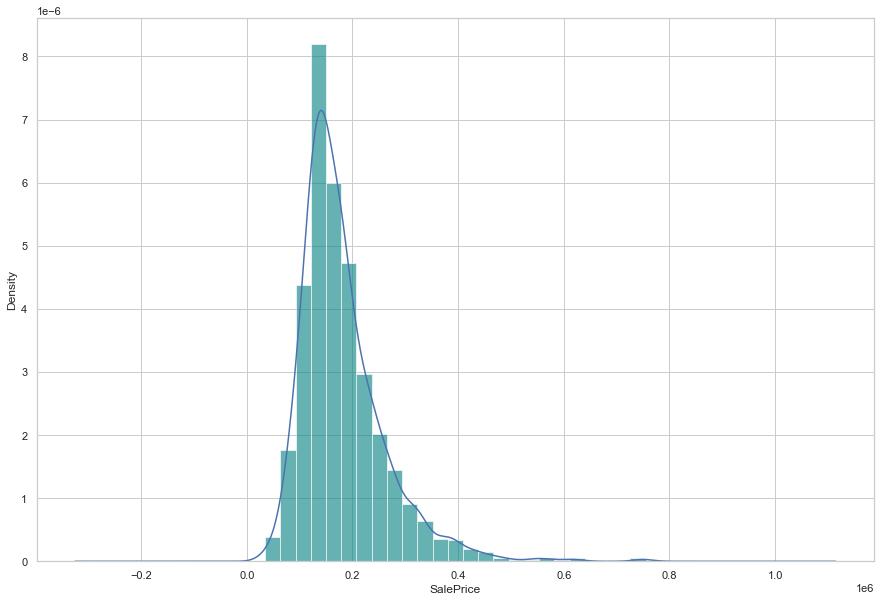

In [27]:
sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(15,10))
train['SalePrice'].hist(bins=25, density=True, stacked =True, color='teal', alpha =0.6)
train['SalePrice'].plot(kind='density')
plt.xlabel('SalePrice')
plt.show()

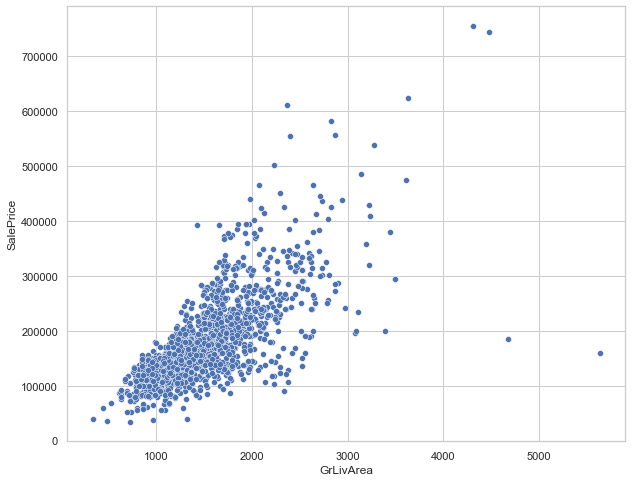

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

In [29]:
#import sklearn for split data-set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [30]:
X_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
680,681,120,1,8012,1,1,1,1,1,1,1,1,1,1,1,6,5,1980,1980,1,1,1,1,1,1,1,1,1,1,1,1,543,1,119,261,923,1,1,1,1,923,0,0,923,0,0,2,0,2,1,1,5,1,1,1,1,1,264,1,1,1,80,0,0,0,0,0,0,5,2010,1,1
1451,1452,20,1,9262,1,1,1,1,1,1,2,1,1,2,1,8,5,2008,2009,1,1,2,2,2,2,1,2,1,1,1,2,0,2,0,1573,1573,1,2,1,1,1578,0,0,1578,0,0,2,0,3,1,2,7,1,1,1,2,3,840,1,1,1,0,36,0,0,0,0,0,5,2009,2,2
1196,1197,60,1,14054,1,2,1,1,1,1,3,1,1,2,2,7,5,2006,2006,1,1,3,3,1,2,1,2,1,1,2,2,0,2,0,879,879,1,2,1,1,879,984,0,1863,0,0,2,1,4,1,3,9,1,1,2,2,3,660,1,1,1,100,17,0,0,0,0,0,11,2006,2,2
1024,1025,20,1,15498,1,2,1,1,2,1,4,1,1,2,1,8,6,1976,1976,2,2,4,4,1,2,1,1,1,1,2,3,1165,3,400,0,1565,1,1,1,1,2898,0,0,2898,1,0,2,0,2,1,3,10,1,1,1,2,2,665,1,1,1,0,72,174,0,0,0,0,5,2008,3,3
157,158,60,1,12003,1,1,1,1,2,1,4,1,1,2,2,8,5,2009,2010,1,1,3,3,3,2,1,2,2,1,1,2,0,2,0,774,774,1,2,1,1,774,1194,0,1968,0,0,2,1,4,1,2,8,1,1,2,2,3,680,1,1,1,0,75,0,0,0,0,0,5,2010,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,20,1,10420,1,1,1,1,2,1,6,1,1,2,1,6,5,2009,2009,1,1,3,3,1,1,1,2,1,1,4,4,36,2,0,1176,1212,1,2,1,1,1212,0,0,1212,0,0,2,0,3,1,3,6,1,0,1,1,2,460,1,1,1,100,22,0,0,0,0,0,3,2010,1,1
502,503,20,1,9170,1,1,1,1,2,1,6,2,1,2,1,5,7,1965,1965,2,1,7,6,1,1,1,1,4,1,1,3,698,7,96,420,1214,1,2,1,1,1214,0,0,1214,1,0,1,0,2,1,1,6,1,0,4,4,2,461,4,3,1,0,0,184,0,0,0,400,4,2007,1,1
537,538,20,1,12735,1,2,1,1,3,1,7,1,1,2,1,4,5,1972,1972,2,1,7,6,1,1,1,1,4,1,1,1,600,2,0,264,864,1,1,1,1,864,0,0,864,0,0,1,0,3,1,1,5,1,0,4,4,2,576,1,1,1,216,0,0,0,0,0,0,4,2008,3,1
1220,1221,20,1,7800,1,2,1,1,1,1,7,1,1,2,1,5,5,1964,1964,1,1,5,5,1,1,1,1,4,1,1,5,312,3,600,0,912,1,1,1,1,912,0,0,912,0,0,1,0,2,1,1,5,1,0,1,4,1,288,1,1,1,0,0,0,0,0,0,0,11,2006,1,3


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
y_pred

array([[163747.90024688],
       [218837.36779507],
       [197629.39523965],
       [ 85940.7721135 ],
       [146743.05296974],
       [284420.92349369],
       [161303.71001734],
       [114135.79636441],
       [196011.62370859],
       [132021.01734904],
       [245214.77511678],
       [147334.99213836],
       [140275.66462939],
       [215065.44421177],
       [217652.68764971],
       [187576.90876698],
       [236583.63553857],
       [159265.68191828],
       [119152.36848079],
       [187149.31084199],
       [204848.16140011],
       [155234.75063961],
       [ 81134.22533139],
       [252268.46325181],
       [321107.8110581 ],
       [172983.84211732],
       [117383.56440433],
       [179494.92533022],
       [238023.35649799],
       [149258.91106667],
       [205930.69778954],
       [209864.1358865 ],
       [288509.53383928],
       [273639.51088111],
       [183828.93575313],
       [280632.28705116],
       [152128.98169127],
       [145025.48612998],
       [2929

In [40]:
model.coef_, model.intercept_

(array([[-1.71274574e-01, -1.49958262e+02, -4.22773904e+03,
          3.29278233e-01, -4.76485001e+04, -2.48527449e+03,
          7.53759346e+02, -4.93807207e+04,  2.80409760e+03,
          1.15589159e+04,  3.43152205e+02, -3.04740082e+03,
         -5.42159704e+03, -3.84548542e+02,  4.33544809e+02,
          1.53507108e+04,  3.86999543e+03,  2.90974123e+02,
          1.79600619e+02,  4.93350169e+03, -1.96422514e+04,
          5.36621024e+02, -9.94412429e+02, -2.08780411e+03,
          1.75444807e+04,  1.95587994e+03, -8.17246955e+02,
          1.74974639e+03, -2.76308597e+03,  3.34851246e+03,
          8.14564934e+02,  7.69560176e+00,  8.71758441e+02,
          3.55457900e-01,  4.26685133e+00,  1.23179109e+01,
         -2.60749598e+03, -5.21283675e+02,  3.05696403e+03,
          6.22186468e+03,  1.91634738e+01,  2.11848184e+01,
         -2.84866156e+01,  1.18616767e+01,  1.03995388e+04,
          2.81729127e+03,  5.37873873e+03,  3.31839542e+03,
         -6.98571204e+03, -2.00337099e+0

In [47]:
#now i will be to rate my model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'MAE metriks showed: {mean_absolute_error(y_test, y_pred).round(2)}')
print(f'MQE metriks showed: {mean_squared_error(y_test, y_pred).round(2)}')
print(f'R2_score metriks showed: {r2_score(y_test, y_pred).round(2)}')
print(f'RMSE metriks showed: {np.sqrt(mean_squared_error(y_test, y_pred)).round(2)}')

MAE metriks showed: 23423.92
MQE metriks showed: 1528351317.36
R2_score metriks showed: 0.79
RMSE metriks showed: 39094.13
